In [1]:
import numpy as nb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**DATA OVERVIEW**

In [2]:
df_bank = pd.read_csv('train.csv')

#Converting dependent variable categorical to dummy
y = pd.get_dummies(df_bank['outcome'], columns = ['outcome'], prefix = ['outcome'], drop_first = True)
df_bank.head()


,id,age,job,civil,edu,credit,hloan,ploan,ctype,month,...,ccontact,lcdays,pcontact,presult,employment,cprice,cconf,euri3,employees,outcome
0,127087,32,technician,married,university,no,yes,no,cellular,jul,...,7,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,0
1,104222,27,services,single,9K,no,no,no,telephone,may,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,126970,57,services,divorced,unknown,no,no,no,cellular,may,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
3,123366,42,entrepreneur,married,university,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,0
4,100832,49,technician,married,apprenticeship,no,no,yes,telephone,jun,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.958,5228.1,0


**About dataset**

Client information
- id - client id (numeric) 
- age - age of client (numeric)
- job - type of job (categorical: "admin.","artisan","entrepreneur", "housemaid" "management", "retired", "self-employed", "services", "student", "technician", "unemployed", "unknown")
- civil - marital status of client (categorical: "divorced", "married", "single","unknown"; note: "divorced" means divorced or widowed)
- education - education of client (categorical: "4K", "6K", "K9", "K12", "illiterate", "apprenticeship", "university", "unknown")
- credit - has credit in default? (categorical: "no","yes","unknown")
- hloan - has housing loan? (categorical: "no","yes","unknown")
- ploan - has personal loan? (categorical: "no","yes","unknown")

Campaign details
- ctype - contact communication type (categorical: "cellular","telephone")
month - last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")
day - last contact day of the week (categorical: "mon","tue","wed","thu","fri")
- ccontact - current number of contacts performed during this campaign and for this client (numeric, includes last contact)
- lcdays - number of days that passed by since client was last contacted by a previous campaign (numeric; 999 means client was not previously contacted)
- pcontact - number of contacts performed before this campaign and for this client (numeric)
- presult - outcome previous marketing campaigns (categorical: "failure","nonexistent","success")

Socioeconomic indicators
- employment - employment variation rate - quarterly indicator (numeric)
- cprice - consumer price index - monthly indicator (numeric)
- cconf - consumer confidence index - monthly indicator (numeric)
- euri3 - euribor 3 month rate - daily indicator (numeric)
- employees - number of employees - quarterly indicator (numeric)

Outcome variable (target)
- outcome - has the client opened a saving account? (binary: 1 = "yes", 0 = "no")

In [3]:
#Data type, number of columns and null values
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28831 entries, 0 to 28830
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          28831 non-null  int64  
 1   age         28831 non-null  int64  
 2   job         28831 non-null  object 
 3   civil       28831 non-null  object 
 4   edu         28831 non-null  object 
 5   credit      28831 non-null  object 
 6   hloan       28831 non-null  object 
 7   ploan       28831 non-null  object 
 8   ctype       28831 non-null  object 
 9   month       28831 non-null  object 
 10  day         28831 non-null  object 
 11  ccontact    28831 non-null  int64  
 12  lcdays      28831 non-null  int64  
 13  pcontact    28831 non-null  int64  
 14  presult     28831 non-null  object 
 15  employment  28831 non-null  float64
 16  cprice      28831 non-null  float64
 17  cconf       28831 non-null  float64
 18  euri3       28831 non-null  float64
 19  employees   28831 non-nul

In [4]:
df_bank = df_bank.drop(columns = ['id', 'month', 'day'])

In [5]:
df_bank.describe()

,age,ccontact,lcdays,pcontact,employment,cprice,cconf,euri3,employees,outcome
count,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000
mean,40.080296,2.574867,962.323124,0.170823,0.081249,93.574302,-40.496743,3.622575,5167.135174,0.111304
std,10.426239,2.780901,187.277267,0.486648,1.572366,0.579193,4.642811,1.733652,72.072751,0.314513
min,17.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


**DATA EXPLORATION**

**1. Label**

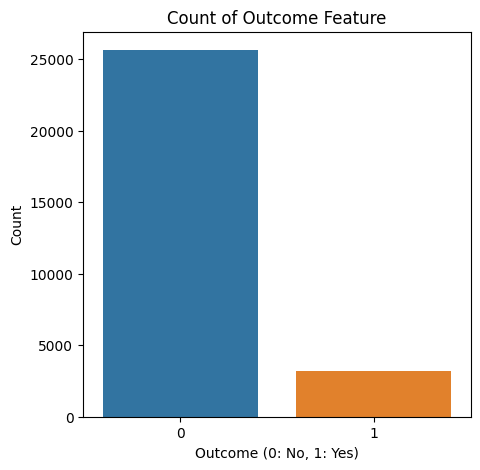

In [6]:
#compare two classes
plt.figure(figsize=(5,5))
sns.countplot(x='outcome', data=df_bank)
plt.xlabel('Outcome (0: No, 1: Yes)')
plt.ylabel('Count')
plt.title('Count of Outcome Feature')
plt.show()


The label contains 2 classes "0" and "1" in which these classes are imbalance. 88% of label is class "0" while class "1" account of small percentage of label. Therefore we will use special technique to avoid bias and overfit in training data which will be mentioned later.

**2. Compare attributes between outcomes**

In [7]:
#Divided all features in dataframe into categorical and numerical features
numeric_features = list((df_bank.drop(columns = 'outcome').select_dtypes(include=["int64", "float64"]).columns).values)
categorical_features = list((df_bank.drop(columns = 'outcome').select_dtypes(include=["object"]).columns).values)

print("numeric_features is:", numeric_features)
print("categorical_features is:", categorical_features)

numeric_features is: ['age', 'ccontact', 'lcdays', 'pcontact', 'employment', 'cprice', 'cconf', 'euri3', 'employees']
categorical_features is: ['job', 'civil', 'edu', 'credit', 'hloan', 'ploan', 'ctype', 'presult']


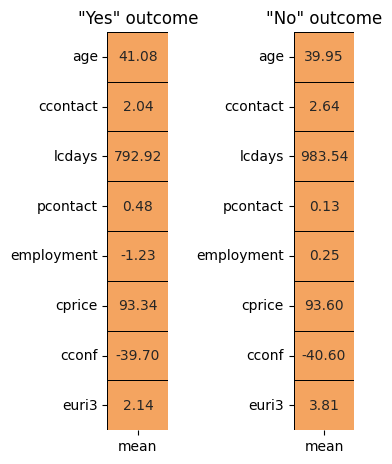

In [8]:
# The attribution of all features to outcome
yes = df_bank.drop(columns = ['employees','outcome'])[df_bank['outcome'] == 1].describe().T
no = df_bank.drop(columns = ['employees', 'outcome'])[df_bank['outcome'] == 0].describe().T
colors = ['sandybrown']

fig, ax = plt.subplots(nrows = 1, ncols=2, figsize=(4,5))
plt.subplot(1,2,1)

sns.heatmap(yes[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f',)
plt.title('"Yes" outcome');

plt.subplot(1,2,2)
sns.heatmap(no[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('"No" outcome');

fig.tight_layout(pad = 2)

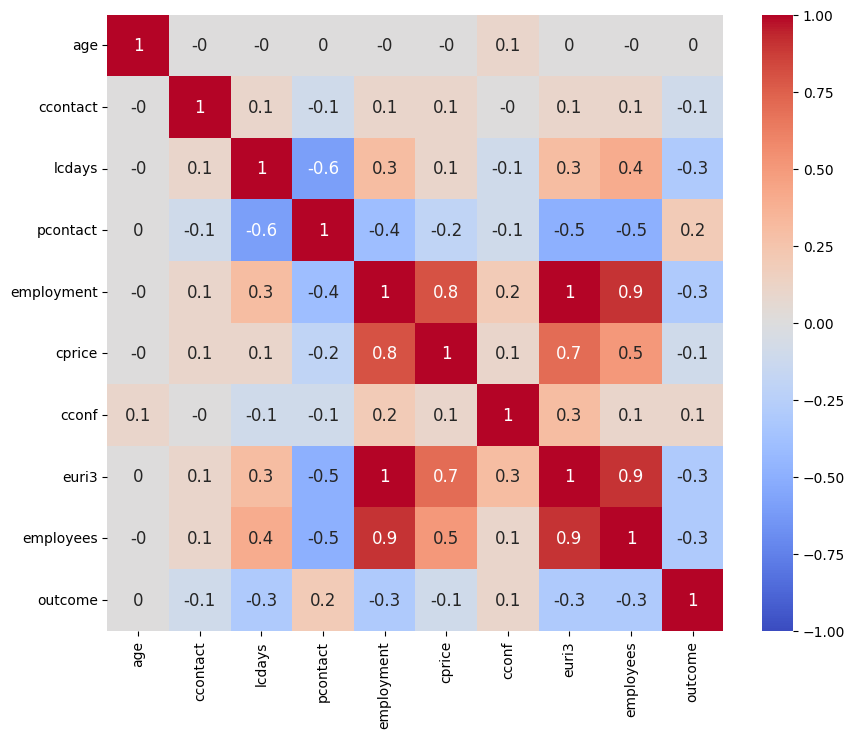

In [9]:
# Find the correlation coefficients of outcome with the other variables
corr_matrix = df_bank.corr().round(1)

# Plot the matrix
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1, center=0, square=True, annot=True, annot_kws={"size": 12})
plt.show()

*Numerical features*

In [15]:
numeric_features

['age',
 'ccontact',
 'lcdays',
 'pcontact',
 'employment',
 'cprice',
 'cconf',
 'euri3',
 'employees']

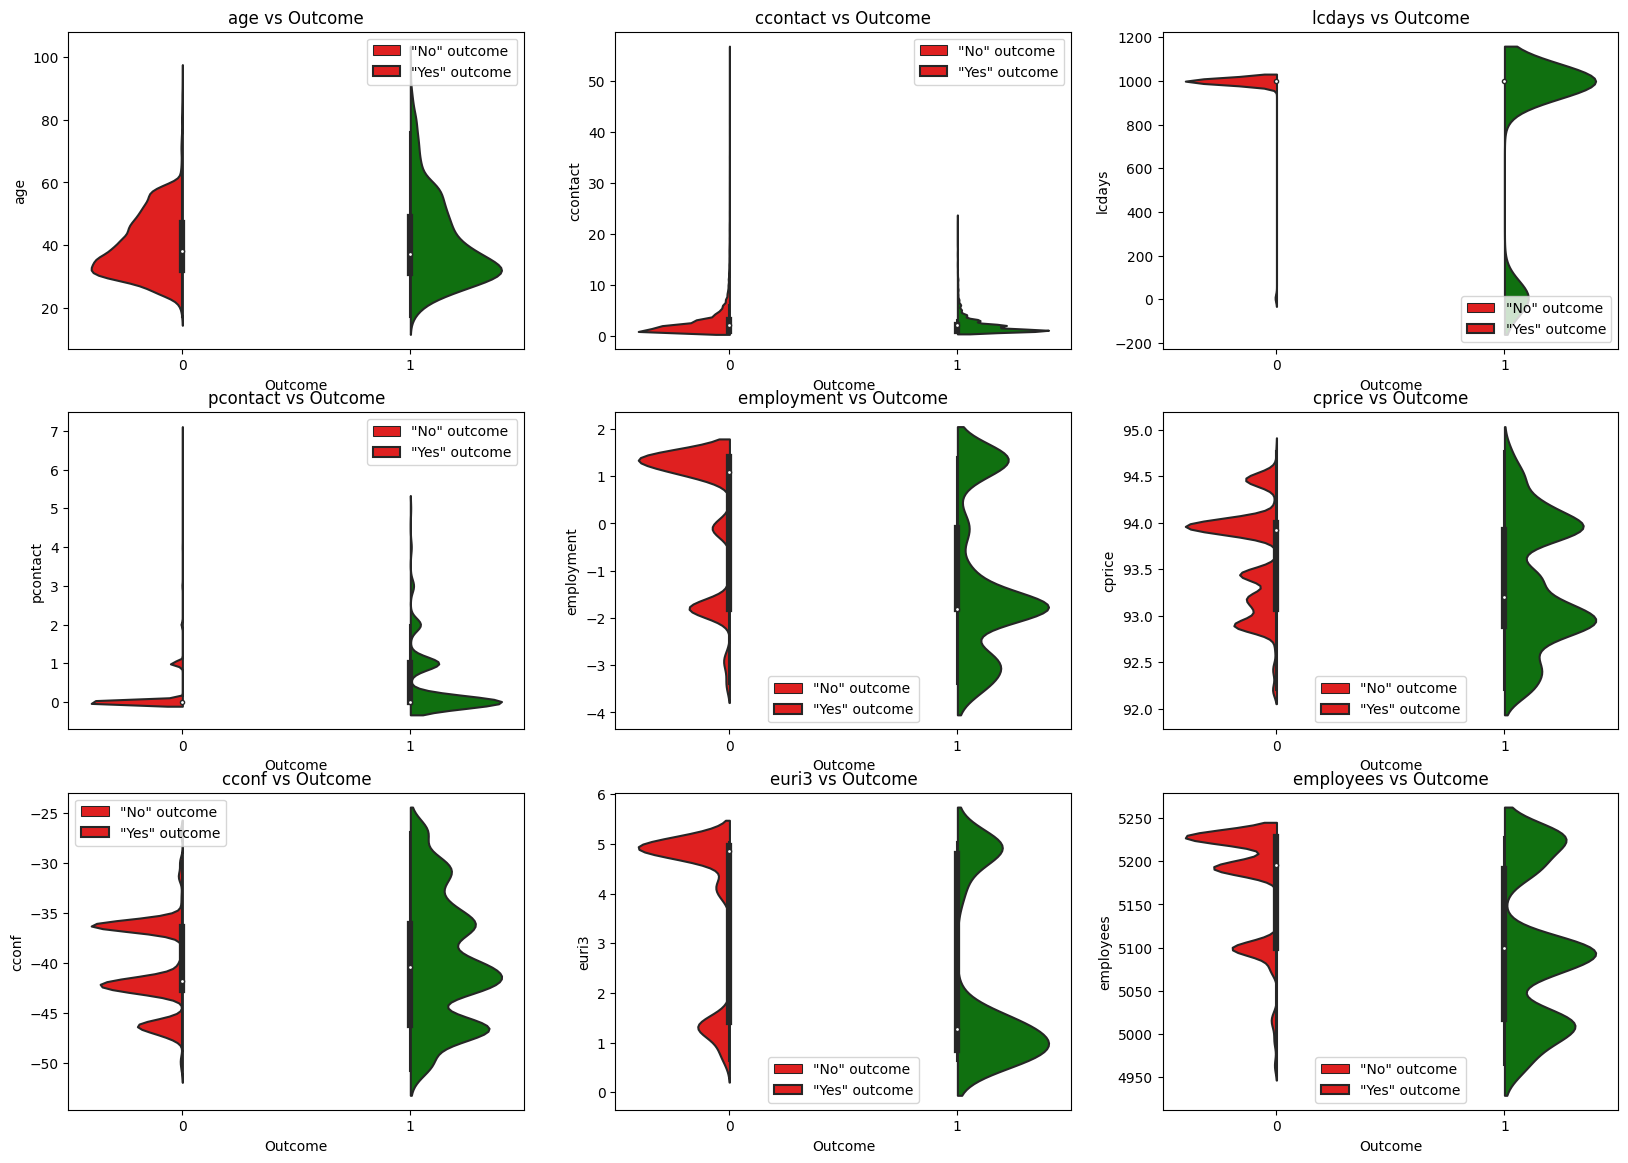

In [14]:
colors = ['red','green']
fig, ax = plt.subplots(nrows = 3,ncols = 3,figsize = (20,14))

for i in range(len(numeric_features)):
    plt.subplot(3,3,i+1)
    ax = sns.violinplot(x = "outcome", y = numeric_features[i], data = df_bank, hue = "outcome", split = True, palette = colors, edgecolor = 'black')
    plt.xlabel('Outcome')
    plt.ylabel(numeric_features[i])
    title = numeric_features[i] + ' vs Outcome'
    plt.legend(['"No" outcome','"Yes" outcome'])
    plt.title(title)

*Categorical variables*

In [11]:
categorical_features

['job', 'civil', 'edu', 'credit', 'hloan', 'ploan', 'ctype', 'presult']

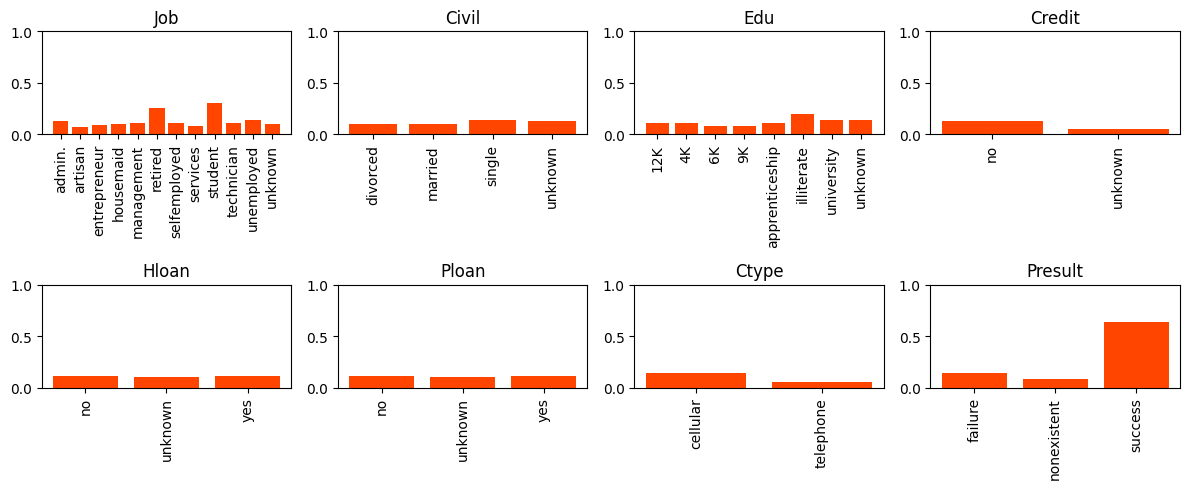

In [12]:
# Create subplots
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(12, 5))
axs = axs.flatten()

# Plot class distribution for each categorical feature
for i, feature in enumerate(categorical_features):
    
    # Group data by feature and outcome (class 0 and 1)
    data = df_bank.groupby([feature, 'outcome'])['outcome'].count().unstack()
    
    # Normalize data by row to get percentage
    data = data.div(data.sum(axis=1), axis=0)
    
    # Plot bar plot for class 1 only
    axs[i].bar(data.index, data[1], color='orangered')
    
    # Set title
    axs[i].set_title(feature.capitalize())
    
    # Rotate x-axis labels if feature name is longer than 4 characters
    if len(feature) > 2:
        axs[i].tick_params(axis='x', labelrotation=90)
    
    # Set y-axis limits to 0 and 1 for class 1
    axs[i].set_ylim(0, 1)
    
plt.tight_layout()
plt.show()